In [1]:
import json
from abakit.lib.Controllers.UrlController import UrlController
from abakit.lib.annotation_layer import AnnotationLayer
from abakit.atlas.VolumeMaker import VolumeMaker
from abakit.atlas.NgSegmentMaker import NgConverter
import os
import numpy as np
import json


In [2]:
volume_id = '9df3e7981321d6249c88fdada72a1230a76829bc'
controller = UrlController()
url = controller.get_urlModel(462)
state_json = json.loads(url.url)
layers = state_json['layers']
for layeri in layers:
    if layeri['type'] == 'annotation':
        layer = AnnotationLayer(layeri)
        volume = layer.get_annotation_with_id(volume_id)
        if volume is not None:
            break

In [3]:
volume

In [7]:
contours.keys()

dict_keys([326, 325, 324, 323, 322, 321, 320, 319, 318, 317, 316, 315, 314, 313, 312, 311, 310, 309, 308, 307, 306, 305, 304, 303, 302, 301, 300, 299, 298, 297, 296, 295, 294])

In [4]:
animal = 'test'
vmaker = VolumeMaker(animal,check_path = False)
structure,contours = volume.get_volume_name_and_contours()
vmaker.set_aligned_contours({structure:contours})
vmaker.compute_COMs_origins_and_volumes()


100%|██████████| 1/1 [00:00<00:00,  1.10it/s]


In [8]:
vmaker.volumes['5N_R'].shape

(1140, 1724, 33)

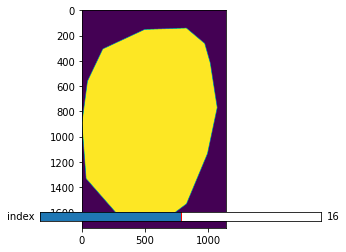

In [9]:
vmaker.plotter.plot_3d_image_stack(vmaker.volumes['5N_R'],axis=2)

In [10]:
res = vmaker.get_resolution()
segment_properties = vmaker.get_segment_properties(structures_to_include=[structure])
folder_name = f'test_ng_maker'
output_dir = os.path.join(vmaker.path.segmentation_layer,folder_name)
maker = NgConverter(volume = vmaker.volumes[structure].astype(np.uint8),scales = [res*1000,res*1000,20000],offset=list(vmaker.origins[structure]))
maker.create_neuroglancer_files(output_dir,segment_properties)

Tasks:   0%|          | 0/1 [00:00<?, ?it/s]

Volume Bounds:  Bbox([26551, 12686, 293],[27692, 14411, 327], dtype=int32)
Selected ROI:   Bbox([26551, 12686, 293],[27692, 14411, 327], dtype=int32)


Tasks: 100%|██████████| 999/999 [00:03<00:00, 272.12it/s]


In [12]:
res

0.325